---
---

<h1><center><ins>Exercise Sheet 7</ins></center></h1>
<h2><center>Numerical Methods <br><br>

---
---

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Exercise 1 - Backward Euler:

Consider the following first-order ODE:

$$ \frac{d y}{dt} = - 3 y \ , $$

**(A)** Solve this ODE with **your own forward Euler** implementation for $0\leq t\leq20$. Use the following step sizes: $\Delta t = 0.1, 0.25, 0.5, 0.75$, and plot the numerical solution for all four step sizes in four different figures. Also compare it with the exact analytical solution in the corresponding plot. Discuss your findings.

**(B)** Now implement **your own backward Euler** implementation and repeat all the steps from **(A)**. What do you notice?

**(C)** What complication arises in the implementation of the backward Euler, if we replace the right hand side of the ODE with $ (1-\frac{y}{3})y $? What kind of numerical methods already known from the lecture can you use to solve the arising equation? Please implement them to solve this ODE with the backward Euler and compare your solution with analytic one by plotting them in a figure.

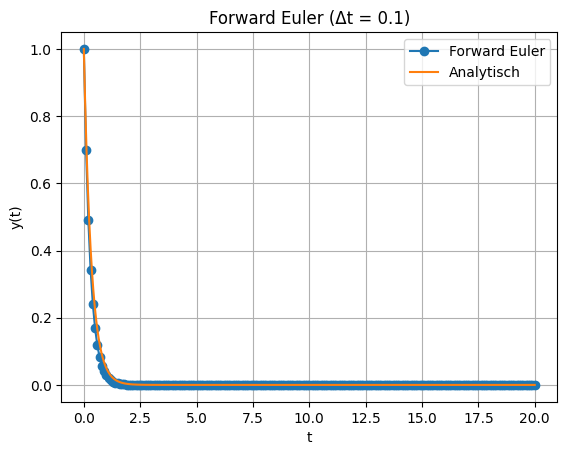

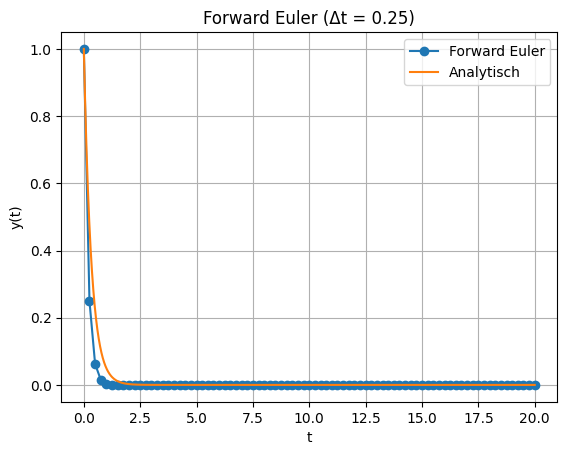

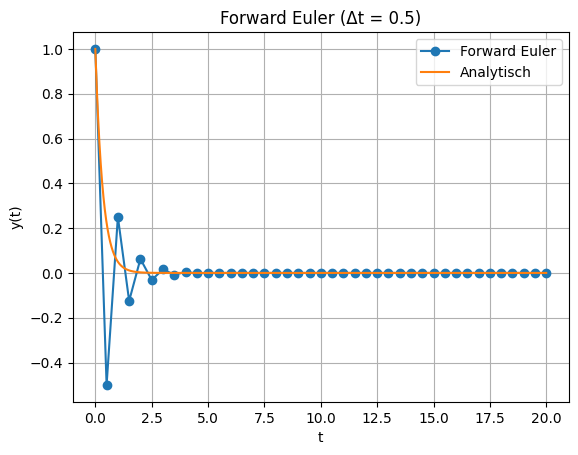

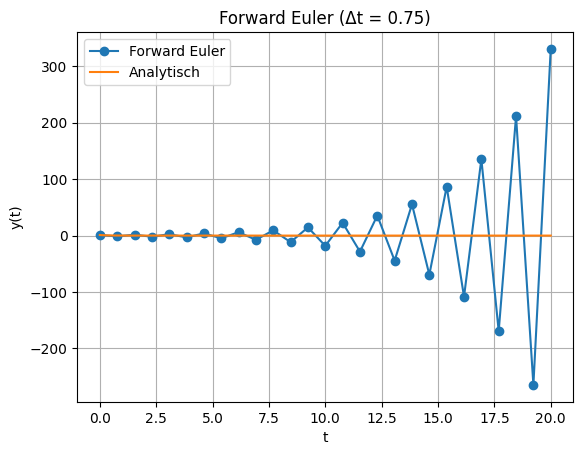

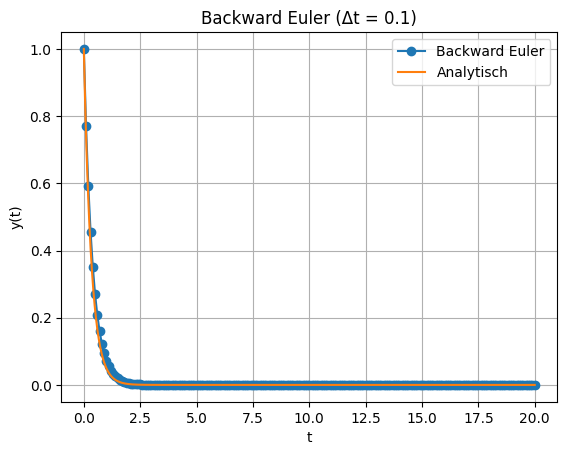

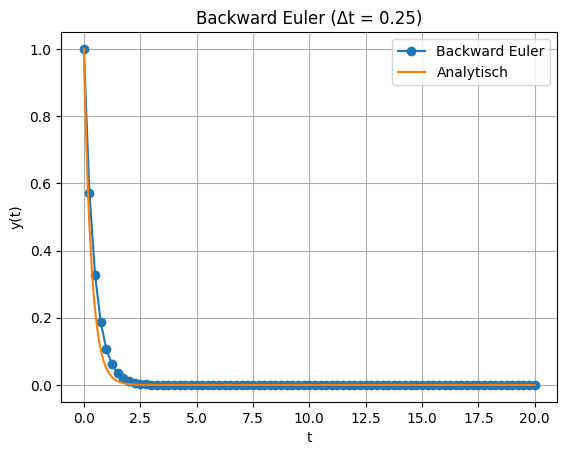

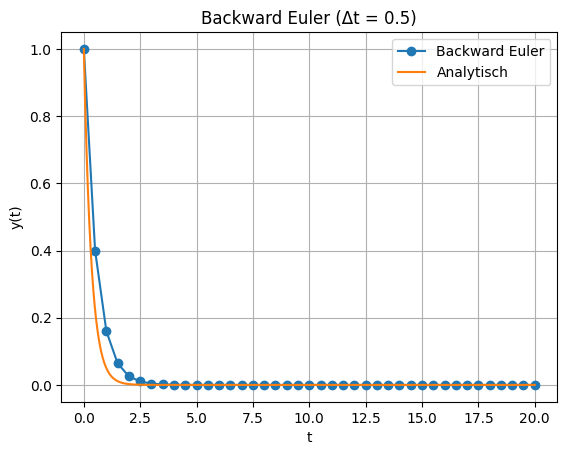

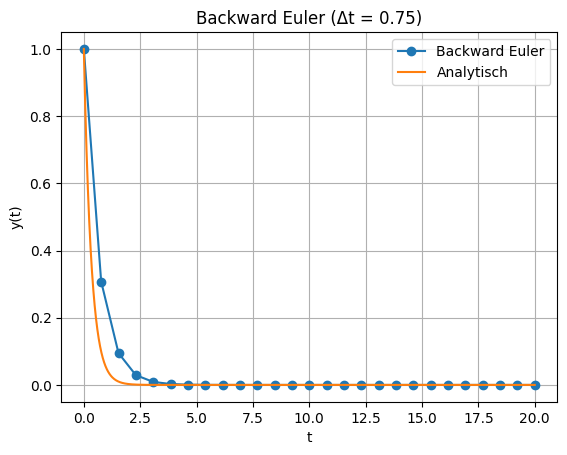

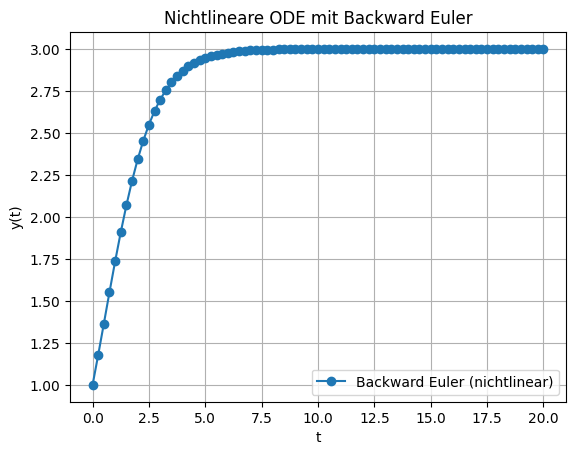

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Das ODE lautet: dy/dt = -3y
def analytic_solution(t, y0):
    return y0 * np.exp(-3 * t)


# FORWARD EULER METHOD (explizit)
# Formel: y_{n+1} = y_n + Δt * f(t_n, y_n)
def forward_euler(f, y0, t0, t_end, dt):
    # Anzahl der Schritte
    N = int((t_end - t0) / dt)
    # Zeitpunkte
    t = np.linspace(t0, t_end, N+1)
    # Speicher für Lösung
    y = np.zeros(N+1)
    y[0] = y0
    # Expliziter Schritt
    for n in range(N):
        y[n+1] = y[n] + dt * f(t[n], y[n])

    return t, y


# BACKWARD EULER METHOD
# Für dy/dt = -3y ergibt der implizite Euler:
# y_{n+1} = y_n + Δt * (-3 y_{n+1})
# Nach y_{n+1} auflösen: y_{n+1} = y_n / (1 + 3Δt)
# y_{n+1} = y_n / (1 + 3Δt)
# Sehr wichtig: Backward Euler ist A-stabil → stabil für jedes Δt.
def backward_euler_linear(y0, t0, t_end, dt):
    N = int((t_end - t0) / dt)
    t = np.linspace(t0, t_end, N+1)
    y = np.zeros(N+1)
    y[0] = y0
    # Implizite Lösung 
    for n in range(N):
        y[n+1] = y[n] / (1 + 3*dt)

    return t, y


# BACKWARD EULER (nicht mehr linear (C))
# Rechte Seite ersetzt durch: dy/dt = -(1 - y/3) * y
# Wenn wir Backward Euler anwenden:
# y_{n+1} = y_n + Δt * (1 - y_{n+1}/3) * y_{n+1}
# Newton-Verfahren für das nicht lineare 
def backward_euler_nonlinear(y0, t0, t_end, dt):
    N = int((t_end - t0) / dt)
    t = np.linspace(t0, t_end, N+1)
    y = np.zeros(N+1)
    y[0] = y0

    for n in range(N):
        # Startwert für Newton-Iteration
        y_new = y[n]

        # Newton-Schritte (10 Iterationen)
        for _ in range(10):
            # Gleichung F(y_{n+1}) = 0
            F = y_new - y[n] - dt * (1 - y_new/3) * y_new
            # Ableitung dF/dy
            dF = 1 - dt * (1 - 2*y_new/3)
            # Newton-Update
            y_new -= F / dF

        y[n+1] = y_new

    return t, y


# Plot
y0 = 1       # Anfangswert
t0 = 0
t_end = 20
dts = [0.1, 0.25, 0.5, 0.75]

f_linear = lambda t, y: -3*y
f_nonlinear = lambda t, y: -(1 - y/3) * y


# A
for dt in dts:
    t_fe, y_fe = forward_euler(f_linear, y0, t0, t_end, dt)
    # Analytische Lösung zu Vergleichszwecken
    t_ana = np.linspace(t0, t_end, 1000)

    plt.figure()
    plt.plot(t_fe, y_fe, "o-", label="Forward Euler")
    plt.plot(t_ana, analytic_solution(t_ana, y0), label="Analytisch")
    plt.title(f"Forward Euler (Δt = {dt})")
    plt.xlabel("t")
    plt.ylabel("y(t)")
    plt.grid()
    plt.legend()


# B
for dt in dts:
    t_be, y_be = backward_euler_linear(y0, t0, t_end, dt)

    t_ana = np.linspace(t0, t_end, 1000)

    plt.figure()
    plt.plot(t_be, y_be, "o-", label="Backward Euler")
    plt.plot(t_ana, analytic_solution(t_ana, y0), label="Analytisch")
    plt.title(f"Backward Euler (Δt = {dt})")
    plt.xlabel("t")
    plt.ylabel("y(t)")
    plt.grid()
    plt.legend()


# C
dt = 0.25
t_nl, y_nl = backward_euler_nonlinear(y0, t0, t_end, dt)

plt.figure()
plt.plot(t_nl, y_nl, "o-", label="Backward Euler")
plt.title("ODE mit Backward Euler")
plt.xlabel("t")
plt.ylabel("y(t)")
plt.grid()
plt.legend()

plt.show()


## Exercise 2 - Backward Euler Part 2:

Consider now the following second-order ODE:

$$ y^{\prime\prime} + 6 y^{\prime} + 5y = 10, $$

with initial conditions of $y(0) = 0$ and $y^{\prime}(0) = 5.$

**(A)** Solve this ODE with **your own backward Euler** implementation for $0\leq t\leq5$. What is the linear system of equation that you have to solve? (write it down in matrix notation). Within **your own backward Euler** implementation you are free to solve this system of equation using either numerical methods (e.g. np.linalg.solve) or invert the matrix by hand. Use a step size of 0.1 and 0.5. Plot the absolute error of the numerical solutions for both steps sizes compared to the exact solution. The exact solution is 

$$ y(t) = -\frac{3}{4}e^{-5t} -\frac{5}{4}e^{-t} + 2. $$


**(B)** Repeat **(A)** using **forward Euler**. What do you notice?

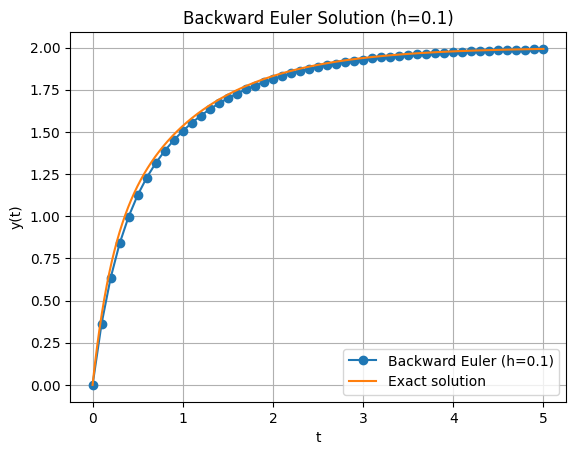

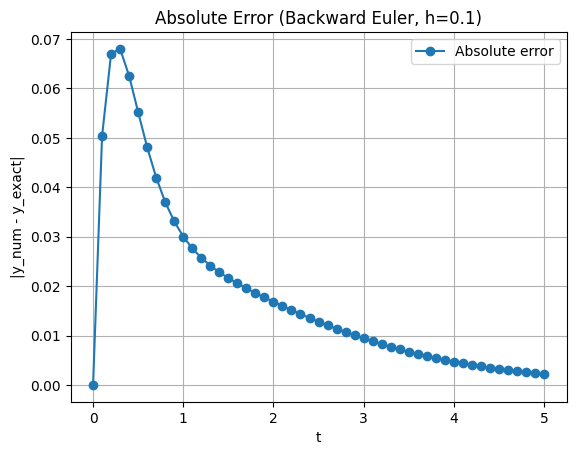

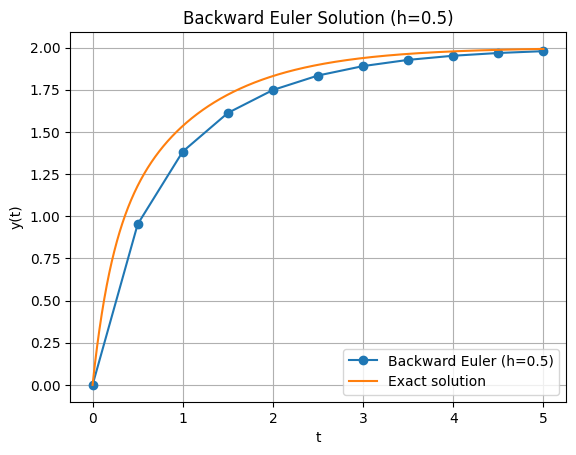

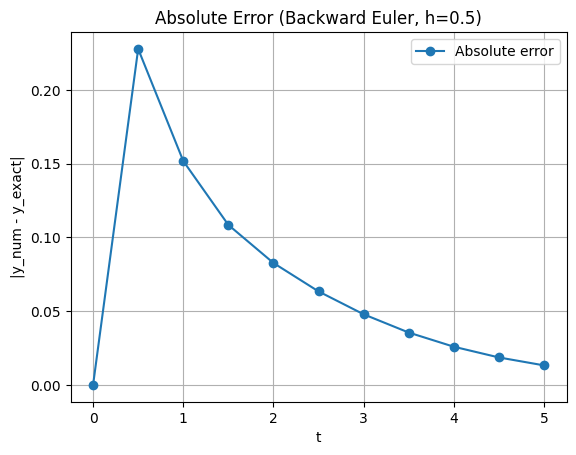

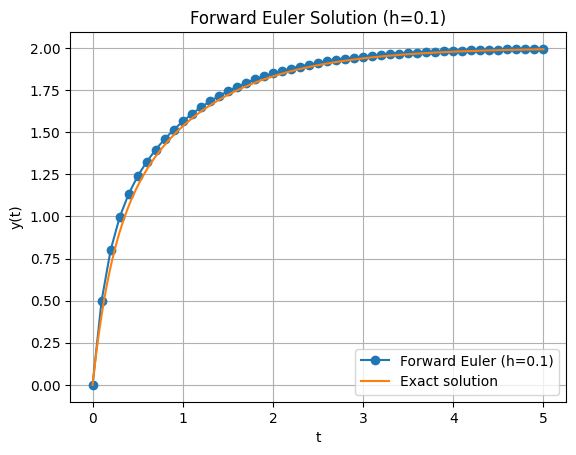

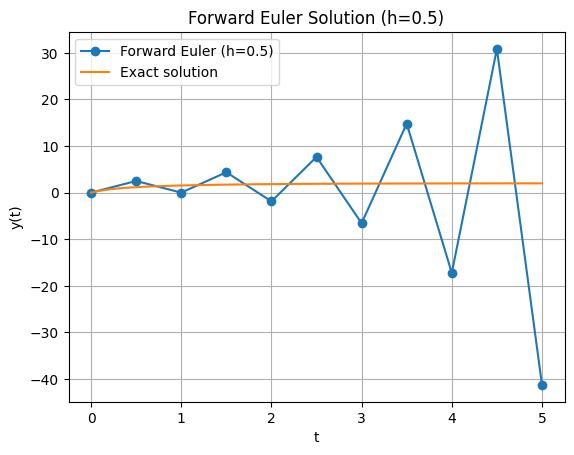

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def exact_solution(t):
    return -(3/4) * np.exp(-5*t) - (5/4) * np.exp(-t) + 2


def backward_euler(A, b, x0, t0, t_end, h):
    N = int((t_end - t0) / h)
    t_vals = np.linspace(t0, t_end, N+1)

    x = np.zeros((N+1, 2))
    x[0] = x0

    I = np.eye(2)
    M = I - h*A           # Matrix to invert
    Minv = np.linalg.inv(M)

    for n in range(N):
        rhs = x[n] + h*b
        x[n+1] = Minv @ rhs

    return t_vals, x


def forward_euler(A, b, x0, t0, t_end, h):
    N = int((t_end - t0) / h)
    t_vals = np.linspace(t0, t_end, N+1)

    x = np.zeros((N+1, 2))
    x[0] = x0

    for n in range(N):
        x[n+1] = x[n] + h * (A @ x[n] + b)

    return t_vals, x


A = np.array([[0,  1],
              [-5, -6]])

b = np.array([0, 10])

x0 = np.array([0, 5])


steps = [0.1, 0.5]

for h in steps:
    t, x_be = backward_euler(A, b, x0, 0, 5, h)
    y_be = x_be[:, 0]

    t_exact = np.linspace(0, 5, 2000)
    y_exact = exact_solution(t_exact)

    # ---------- Plot solution ----------
    plt.figure()
    plt.plot(t, y_be, "o-", label=f"Backward Euler (h={h})")
    plt.plot(t_exact, y_exact, label="Exact solution")
    plt.title(f"Backward Euler Solution (h={h})")
    plt.xlabel("t")
    plt.ylabel("y(t)")
    plt.grid()
    plt.legend()

    # ---------- Plot absolute error ----------
    plt.figure()
    plt.plot(t, np.abs(y_be - exact_solution(t)), "o-", label="Absolute error")
    plt.title(f"Absolute Error (Backward Euler, h={h})")
    plt.xlabel("t")
    plt.ylabel("|y_num - y_exact|")
    plt.grid()
    plt.legend()


for h in steps:
    t, x_fe = forward_euler(A, b, x0, 0, 5, h)
    y_fe = x_fe[:, 0]

    plt.figure()
    plt.plot(t, y_fe, "o-", label=f"Forward Euler (h={h})")
    plt.plot(t_exact, y_exact, label="Exact solution")
    plt.title(f"Forward Euler Solution (h={h})")
    plt.xlabel("t")
    plt.ylabel("y(t)")
    plt.grid()
    plt.legend()

plt.show()


## Exercise 3 - More Oscillators:

Consider again a system of a mass that is attached to a spring. We have seen (look at Exercise Sheet 6 Exercise Number 3) that the resuling ODE describing such a system is of the form

$$ \frac{d^2 x}{dt^2} = - \frac{k}{m} x \ , $$

where $m$ is the mass of your particle, $k$ is the spring constant, and $x$ is the displacement from the equilibrium position.

**(A)** Implement the Leapfrog integration in oder to solve this ODE. Follow the section "Algorithm" under https://en.wikipedia.org/wiki/Leapfrog_integration. Consider the same values for the constants and initial conditions from Exercise Sheet 6 and plot your result by comparing with the analytic solution. Is the accuracy the same as for the Kunge-Kutta method? Why is this integrator called leapfrog? Name one advantage of the leapfrog integration over other methods such as Kunge-Kutta.

Consider now the damped oscillator of the form:

$$ \frac{d^2 x}{dt^2} = - \frac{k}{m} x - \frac{D}{m} \frac{dx}{dt} \ , $$

where $D$ is an additional friction coefficient.

**(B)**
Solve this ODE with the Runge-Kutta method. Either use the build-in python function or your own implementation. Play around with different values for $D$ and compare it to the analytic solution (you may use : https://lemesurierb.people.charleston.edu/numerical-methods-and-analysis-python/main/ODE-IVP-4-system-higher-order-equations-python.html#equation-equation-damped-mass-spring to help you with the analytic solution). Consider all three possibilities of the system being (1) underdamped, (2) overdamped and (3) critically damped (What do these terms mean?). Make a plot for all three cases to show your numerical and analytic solution.

**(C)**
What problem arises if you were to solve the damped oscillator with the leapfrog algorithm? What could be a possible solution to that problem?

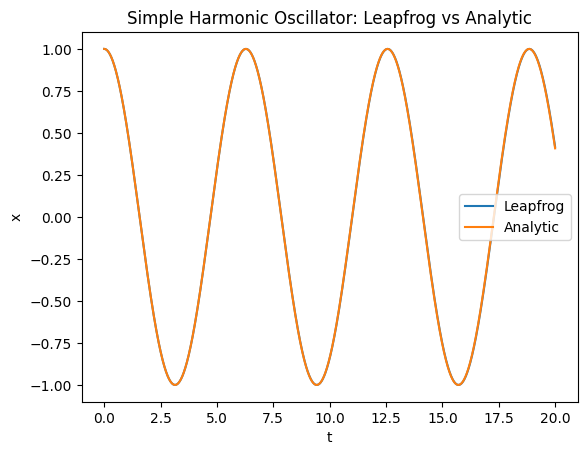

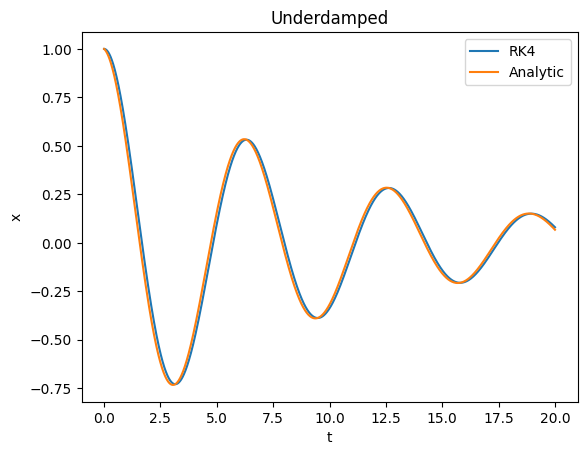

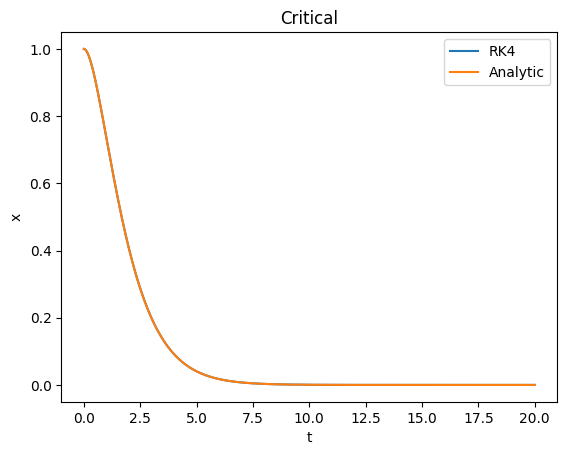

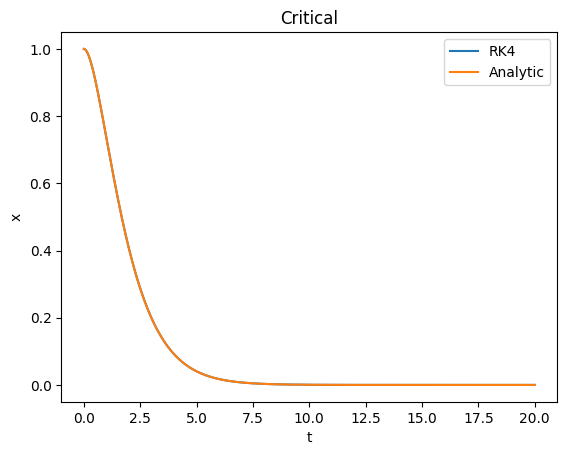

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Part A: Leapfrog integration for simple harmonic oscillator
m = 1.0
k = 1.0
omega = np.sqrt(k/m)

# initial conditions
x0 = 1.0
v0 = 0.0

t_max = 20
dt = 0.01
N = int(t_max/dt)

t = np.linspace(0, t_max, N)
x_lf = np.zeros(N)
v_lf = np.zeros(N)

x_lf[0] = x0
v_half = v0 + 0.5 * (-k/m * x0) * dt

for i in range(1, N):
    x_lf[i] = x_lf[i-1] + v_half * dt
    a = -k/m * x_lf[i]
    v_half = v_half + a * dt

x_analytic = x0 * np.cos(omega * t)

plt.figure()
plt.plot(t, x_lf, label="Leapfrog")
plt.plot(t, x_analytic, label="Analytic")
plt.legend()
plt.xlabel("t")
plt.ylabel("x")
plt.title("Simple Harmonic Oscillator: Leapfrog vs Analytic")
plt.show()

# Part B: Damped oscillator with RK4
def rk4_step(x, v, dt, k, m, D):
    def ax(x, v):
        return -k/m * x - D/m * v
    k1x = v
    k1v = ax(x, v)
    k2x = v + 0.5*dt*k1v
    k2v = ax(x + 0.5*dt*k1x, v + 0.5*dt*k1v)
    k3x = v + 0.5*dt*k2v
    k3v = ax(x + 0.5*dt*k2x, v + 0.5*dt*k2v)
    k4x = v + dt*k3v
    k4v = ax(x + dt*k3x, v + dt*k3v)
    x_new = x + dt*(k1x + 2*k2x + 2*k3x + k4x)/6
    v_new = v + dt*(k1v + 2*k2v + 2*k3v + k4v)/6
    return x_new, v_new

def solve_damped(D):
    x = np.zeros(N)
    v = np.zeros(N)
    x[0] = x0
    v[0] = v0
    for i in range(1, N):
        x[i], v[i] = rk4_step(x[i-1], v[i-1], dt, k, m, D)
    return x

# analytic damped solutions
def analytic_damped(t, D):
    gamma = D/(2*m)
    if gamma < omega:  # underdamped
        wd = np.sqrt(omega**2 - gamma**2)
        return x0 * np.exp(-gamma*t) * np.cos(wd*t)
    elif gamma == omega:  # critical
        return (x0 + (v0 + gamma*x0)*t) * np.exp(-gamma*t)
    else:  # overdamped
        r1 = -gamma + np.sqrt(gamma**2 - omega**2)
        r2 = -gamma - np.sqrt(gamma**2 - omega**2)
        C1 = (v0 - r2*x0)/(r1 - r2)
        C2 = x0 - C1
        return C1*np.exp(r1*t) + C2*np.exp(r2*t)

Ds = [0.2, 2.0, 2*np.sqrt(k*m)]  # under, over, critical

for D in Ds:
    x_num = solve_damped(D)
    x_an = analytic_damped(t, D)
    plt.figure()
    plt.plot(t, x_num, label="RK4")
    plt.plot(t, x_an, label="Analytic")
    plt.xlabel("t")
    plt.ylabel("x")
    if D < 2*np.sqrt(k*m):
        title = "Underdamped"
    elif D > 2*np.sqrt(k*m):
        title = "Overdamped"
    else:
        title = "Critical"
    plt.title(title)
    plt.legend()
    plt.show()
